In [27]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 1. Loading and Preprocessing

In [5]:
# Loading data
# Preprocess the data to handle any missing values and perform necessary feature scaling

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [7]:
# Finding missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


# No missing values in the dataset, so we skip imputation.

In [9]:
# Performing necessary feature scaling
# Split into features and target
X = df.drop('target', axis=1)
y = df['target']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# StandardScaler is used because features are on different scales.

# 2. Classification Algorithm Implementation

# A. Logistic Regression 
Logistic Regression is used for binary classification problems. It models the probability that a given input belongs to a particular class using the logistic(sigmoid) function.

It's suitable for this dataset because:
The target is binary (malignant =0, benign =1).
It performs well when there is a clear separation between classes.

In [11]:
# Using Logistic Regression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Printing results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 0.9737
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]


# B. Decision Tree Classifier
A Decision Tree splits the dataset into smaller subsets based on feature values using if-else conditions. It builds a tree-like structure
Why it's suitable:
It can handle both numerical and categorical data.
Easy to interpret.
Doesn’t require feature scaling (but it’s okay to scale beforehand too

In [13]:
# Using Decision tree Classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Printing results
print("Decision Tree Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Results:
Accuracy: 0.9474
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[40  3]
 [ 3 68]]


# C. Random Forest Classifier
Random Forest is an ensemble learning method that builds multiple decision trees and combines their results (usually using majority voting for classification). 

Why it's suitable:
Handles high-dimensional datasets like this one well.
Reduces overfitting that single decision trees might suffer from.
Provides better generalization performance.

In [15]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Printing results
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Results:
Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]


# D. Support Vector Machine (SVM)

SVM aims to find the best hyperplane that separates data points of different classes with the maximum margin. It’s particularly powerful in high-dimensional spaces and effective when classes are well-separated. There are two main types:

1. Linear SVM – best for linearly separable data.
2. Kernel SVM (e.g., RBF kernel) – handles non-linear boundaries.
   Why it's suitable:
-Great for binary classification (this dataset has 2 target classes: malignant & benign).
-Works well even when feature dimensions are high compared to samples.

In [17]:
# Using Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Printing results
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Support Vector Machine Results:
Accuracy: 0.9737
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]


# E. k-Nearest Neighbors (k-NN)

k-NN is a lazy learning algorithm. It doesn’t build a model during training. Instead, when predicting a new data point, it looks at the ‘k’ closest training examples (neighbors) and assigns the class based on majority vote.
Why it’s suitable:
-Easy to implement and understand.
-Works well for small to medium datasets.
-Effective when similar data points have the same class.

But:
-Performance drops with high-dimensional data (due to the curse of dimensionality).
-Slower predictions on large datasets (since it compares with all training samples).


In [19]:
# Using k-NN

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("k-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

k-Nearest Neighbors Results:
Accuracy: 0.9474
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[40  3]
 [ 3 68]]


# 3. Model Comparison

In [23]:
# To Compare the performasnce of five models we can create a table
# to call Model names and its Accuracy scores
model_names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Support Vector Machine",
    "k- Nearest Neighbors"
]
accuracies = [0.9737, 0.9474, 0.9649, 0.9737, 0.9474]

# To cratte Dataframe
comparison_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies
})
comparison_df.sort_values(by="Accuracy", ascending=False, inplace=True) # for sorting accuracy
print(comparison_df.reset_index(drop=True))

                    Model  Accuracy
0     Logistic Regression    0.9737
1  Support Vector Machine    0.9737
2           Random Forest    0.9649
3           Decision Tree    0.9474
4    k- Nearest Neighbors    0.9474


C:\Users\user\AppData\Local\Temp\ipykernel_1192\1424824992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=comparison_df, palette="viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

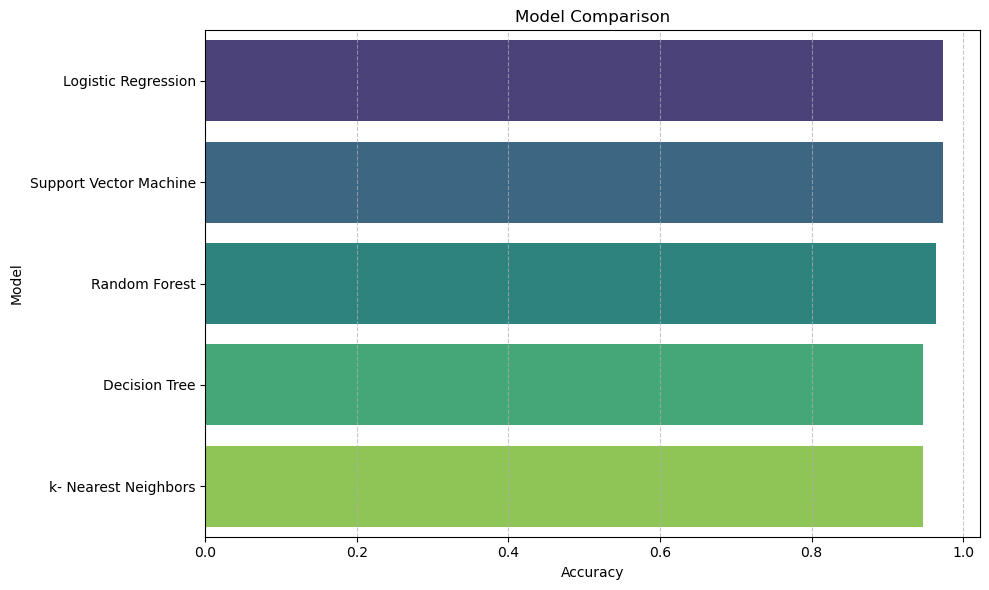

In [29]:
# Creating a Bar plot

plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=comparison_df, palette="viridis")
plt.title("Model Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show
